In [1]:
using StatsBase

In [2]:
using StatsPlots

In [3]:
n = 10000
x = randn(n)
v = randn(n)
;

In [4]:
nx = 16
nv = 12
;

In [5]:
xmax = ceil(maximum(abs.(x)))
x .+= xmax
x ./= 2*xmax
;

In [6]:
vmax = ceil(maximum(abs.(v)))

4.0

In [7]:
Δx = 1/nx

0.0625

In [8]:
xgrid = collect(0:Δx:1);

In [9]:
vgrid = LinRange(-vmax, +vmax, nv)

12-element LinRange{Float64}:
 -4.0,-3.27273,-2.54545,-1.81818,…,1.09091,1.81818,2.54545,3.27273,4.0

In [10]:
hx = fit(Histogram, x, xgrid)
hv = fit(Histogram, v, vgrid);

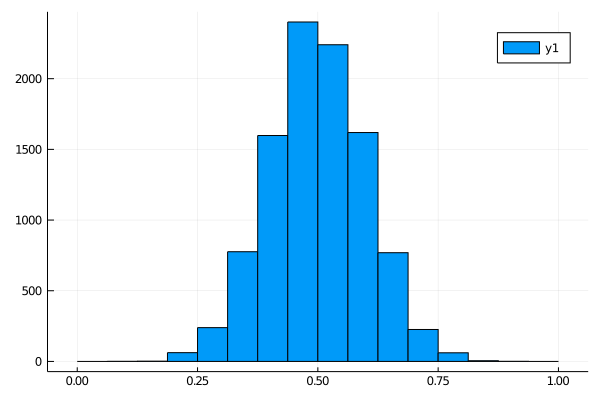

In [11]:
plot(hx)

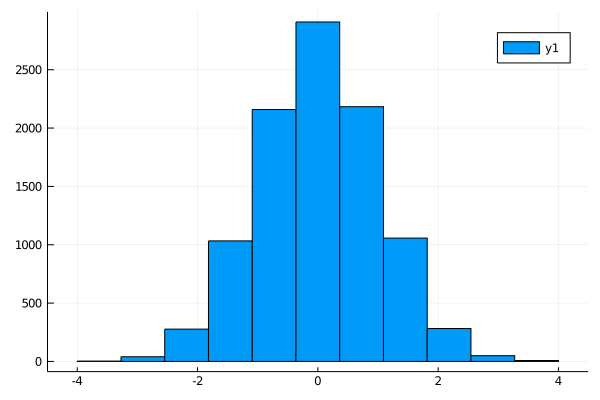

In [12]:
plot(hv)

In [13]:
using FFTW

In [14]:
ρ = hx.weights ./ n;

In [15]:
ρ̂ = rfft(ρ);

In [16]:
k = [(i-1) for i in eachindex(ρ̂)];

In [17]:
ϕ̂ = - ρ̂ ./ k.^2;

In [18]:
ϕ̂[1] = 0;

In [19]:
ϕ = irfft(ϕ̂, length(ρ));

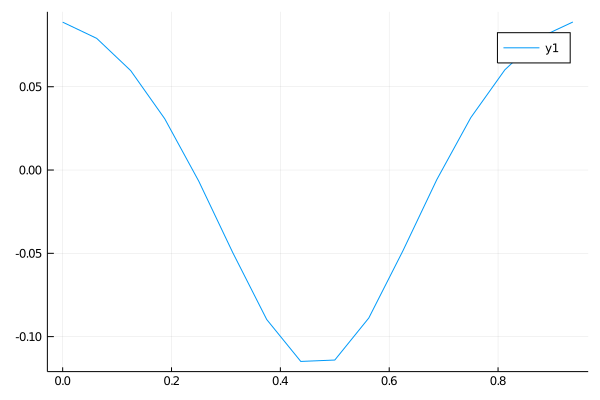

In [20]:
plot(xgrid[1:end-1], ϕ)

In [21]:
x = 0.0001

0.0001

In [22]:
y = mod(x, one(x))

0.0001

In [23]:
i1 = floor(Int, y / Δx) + 1

1

In [24]:
i2 = mod( ceil(Int, y / Δx), nx) + 1

2

In [25]:
i1 == i2 && (i1 = i1-1)

false

In [26]:
i1 == 0 && (i1 = lastindex(ϕ))

false

In [27]:
(i1, i2)

(1, 2)

In [28]:
function Efield(x, Δx, ϕ)
    y = mod(x, one(x))
    i1 = floor(Int, y / Δx) + 1
    i2 = mod( ceil(Int, y / Δx), nx) + 1
    i1 == i2 && (i1 = i1-1)
    i1 == 0 && (i1 = lastindex(ϕ))
    return - (ϕ[i2] - ϕ[i1]) / Δx
end

Efield (generic function with 1 method)

In [29]:
Efield(x[1], Δx, ϕ)

0.15562860331633344